In [ ]:
! pip install pydub

In [ ]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
import math
import os

Link for model

https://drive.google.com/drive/folders/1IhYpcSq61YKH9IpO144ZqoGYERo2K4EX?usp=sharing

download the model directory with all 3 files and paste it on your machine









In [ ]:
! mkdir test test_img


*   The main audio wav file is split and saved in 'test' dir
*   the specgram is then obtained on these split wav files and then saved in 'test_img' dir



In [ ]:
class SplitWavAudioMubin():  # to split the audio 
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '/' + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 1000
        t2 = to_min * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder + '/test/' + split_filename, format="wav") # splitted audio file will be saved in 'test' dir
        
    def multiple_split(self, sec_per_split):
        total_sec = math.ceil(self.get_duration())
        for i in range(0, total_sec, sec_per_split):
            split_fn = str(i) + '_' + self.filename
            self.single_split(i, i+sec_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_sec - sec_per_split:
                print('All splited successfully')

In [ ]:
!cp /content/drive/My\ Drive/Audio/test.wav /content

In [ ]:
folder = '/content' # dir where test.wav file is present
file = 'test.wav' # wav audio file which is to be splitted
split_wav = SplitWavAudioMubin(folder, file)
split_wav.multiple_split(sec_per_split=5)

0 Done
5 Done
10 Done
15 Done
20 Done
25 Done
30 Done
35 Done
40 Done
45 Done
50 Done
55 Done
60 Done
65 Done
70 Done
75 Done
80 Done
85 Done
90 Done
95 Done
100 Done
105 Done
110 Done
115 Done
120 Done
125 Done
130 Done
135 Done
140 Done
145 Done
150 Done
155 Done
160 Done
165 Done
170 Done
175 Done
180 Done
185 Done
190 Done
195 Done
200 Done
205 Done


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


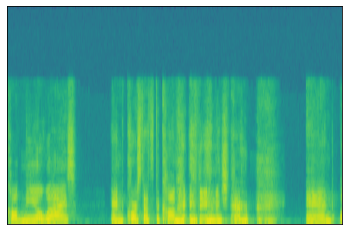

In [ ]:
# this takes time to run.
for i in os.listdir('test'): # specgram generation for each splitted wav file in test dir
  try:
    FS, data = wavfile.read('test/'+i)
    plt.specgram(data, Fs=FS, NFFT=128, noverlap=0)  # plot
    plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
    plt.savefig('test_img/'+i[:-4]+'.png', bbox_inches='tight', pad_inches=0) # each specgram saved in test_dir 
  except:
    pass

## Inference

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
path=Path('/content/test_img') # path to test_img dir
path

PosixPath('/content/test_img')

In [ ]:
! cp -r /content/drive/My\ Drive/output /content/

In [ ]:
learn = load_learner('/content/output', test=ImageList.from_folder(path)) # load the model with inference databunch. 'output' dir will have export.pkl(model)

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test) # prediction on complete inference databunch

In [ ]:
preds[0] # ignore preds[1], its a bug from fastai

tensor([[3.3148e-02, 9.6685e-01],
        [2.9162e-03, 9.9708e-01],
        [7.4728e-06, 9.9999e-01],
        [2.9213e-03, 9.9708e-01],
        [3.8110e-02, 9.6189e-01],
        [5.4654e-04, 9.9945e-01],
        [3.7636e-04, 9.9962e-01],
        [1.0436e-02, 9.8956e-01],
        [3.6527e-03, 9.9635e-01],
        [5.1270e-04, 9.9949e-01],
        [1.2120e-04, 9.9988e-01],
        [7.1201e-04, 9.9929e-01],
        [5.1616e-04, 9.9948e-01],
        [2.3153e-02, 9.7685e-01],
        [3.7699e-01, 6.2301e-01],
        [3.6716e-03, 9.9633e-01],
        [8.4704e-04, 9.9915e-01],
        [5.1394e-02, 9.4861e-01],
        [5.5649e-03, 9.9444e-01],
        [5.2675e-04, 9.9947e-01],
        [1.2446e-01, 8.7554e-01],
        [4.6733e-02, 9.5327e-01],
        [1.3496e-03, 9.9865e-01],
        [5.3651e-03, 9.9463e-01],
        [7.2250e-03, 9.9278e-01],
        [9.1854e-04, 9.9908e-01],
        [2.8381e-03, 9.9716e-01],
        [9.6201e-02, 9.0380e-01],
        [8.7580e-03, 9.9124e-01],
        [3.428

0- Fake
1- Real

In [ ]:
np.argmax(preds[0][0]) # class for each image can be found like this. 0 is fake and 1 is real. 

tensor(1)